## 1) Robustez vs. ataques: aeropuertos (libre de escala) vs. alcantarillado (reticular / mundo pequeño)

**Distribución de grados (idea clave)**  
- **Libre de escala (aeropuertos):** $$P(k)\sim k^{-\gamma}$$ con $$2<\gamma<3$$ ⇒ existen **hubs** muy conectados y muchos nodos de bajo grado.  
- **Reticular / mundo pequeño (alcantarillado):** grados **acotados y homogéneos**, **alto clustering** local y algunos **atajos**.

**Fallas aleatorias**  
- **Más vulnerable:** alcantarillado, al carecer de hubs que amortigüen eliminaciones al azar.  
- **Más robusta:** aeropuertos, porque las fallas típicamente afectan nodos de bajo grado y los hubs sostienen la **componente gigante**.

**Ataques dirigidos**  
- **Más vulnerable:** aeropuertos; la caída coordinada de los 5 hubs mayores rompe puentes globales, aumenta el diámetro y fragmenta la red.  
- **Más robusta:** alcantarillado; sin hubs claros, atacar 5 estaciones resulta menos devastador y suelen existir rutas locales alternativas.



## 2) Cuándo no aplica Barabási–Albert (BA) y por qué

**Suposiciones de BA**  
(1) **Crecimiento** sostenido del grafo. (2) **Adjunción preferencial** (nuevos nodos se conectan ∝ al grado).

**Ejemplo que viola BA: red vial urbana (calles–intersecciones)**  
- La geometría y la regulación **planar** limitan el grado; no es factible añadir muchas aristas a un mismo nodo.  
- La adjunción preferencial **no es pura**; el grado queda **acotado** por capacidad/espacio.  
- En consecuencia, $$P(k)$$ **no** sigue una ley de potencia clara y **no** emergen hubs extremos.

**Inadecuación del modelo BA**  
- **Sobreestima** la aparición de hubs y de colas pesadas en $$P(k)$$.  
- Omite **costos, espacialidad y límites de capacidad**.  
- Induce predicciones de longitudes de camino y resiliencia que **no** corresponden a redes geométricas.


## 3) Watts–Strogatz: variación de clustering y longitud de camino con $$p$$

**Puntos de referencia**  
- Anillo regular con grado medio $$\langle k\rangle=k$$.  
- En $$p=0$$ (orden): $$C(0)\approx\frac{3\,(k-2)}{4\,(k-1)}$$ y $$L(0)\sim\frac{n}{2k}$$.  
- En $$p=1$$ (aleatoria Erdős–Rényi): $$C_{\text{rand}}\approx\frac{\langle k\rangle}{n}$$ y $$L_{\text{rand}}\sim\frac{\ln n}{\ln\langle k\rangle}$$.

**Tendencias al aumentar $$p\in[0,1]$$**  
- **Clustering**: $$C(p)$$ **decrece gradualmente** desde $$C(0)$$ hacia ≈ $$\langle k\rangle/n$$. Aproximación ilustrativa: $$C(p)\approx C(0)\,(1-p)^3$$.  
- **Longitud de camino**: $$L(p)$$ **cae con rapidez** incluso con $$p\ll 1$$; unos pocos atajos bastan para aproximar $$L_{\text{rand}}$$.

**Efecto de un $$p=0.01$$**  
- Con solo 1% de recableo aparecen **atajos** entre nodos lejanos, de modo que  
  $L(p\!\ll\!1)\approx L_{\text{rand}}\quad\text{mientras}\quad C(p\!\ll\!1)\approx C(0).$  
- Se obtiene el **régimen de mundo pequeño**: **caminos cortos** sin perder **clustering** local elevado.


## 4) Red social con comunidades fuertes **y** hubs: regla generativa

**Objetivo**  
- Mantener **comunidades densas** (universidad, trabajo) con clustering alto.  
- Permitir **hubs/influencers** para inducir cola pesada en $$P(k)$$.

**Regla conceptual (sin código)**  
1) **Base comunitaria**: crear $$B$$ comunidades de tamaños $$n_1,\dots,n_B$$; dentro de cada una, conectar con **WS de $$p$$ bajo** o **SBM** con $$p_{\text{in}}$$ alto (clustering).  
2) **Fitness / popularidad**: asignar a cada nodo una **fitness** $$\eta_i$$ (p. ej., log-normal o potencia truncada) como atractivo global.  
3) **Adjunción mixta** por enlace:  
   - Con prob. $$\alpha$$ (**cierre triádico**), conectar con amigos de amigos (refuerzo comunitario y clustering).  
   - Con prob. $$1-\alpha$$ (**preferencia global**), elegir destino con prob. $$\propto\,\eta_j\,(k_j+1)^{\beta}$$ (emergencia de hubs).  
4) **Puentes intercomunidad**: con prob. pequeña $$\varepsilon$$, dirigir el enlace a otra comunidad (atajos y caminos cortos).  
5) **Envejecimiento / capacidad (opcional)**: decrecer la atractividad con el tiempo y limitar el grado en nodos comunes (los de alta $$\eta$$ admiten límites mayores).

**Resultado esperado**  
- **Comunidades sólidas** (WS/SBM + cierre triádico) ⇒ $$C$$ local alto.  
- **Hubs globales** (preferencia ponderada por $$\eta$$) ⇒ cola pesada en $$P(k)$$.  
- **Caminos cortos** (puentes esporádicos entre comunidades).  




## **Ejercicio 1**

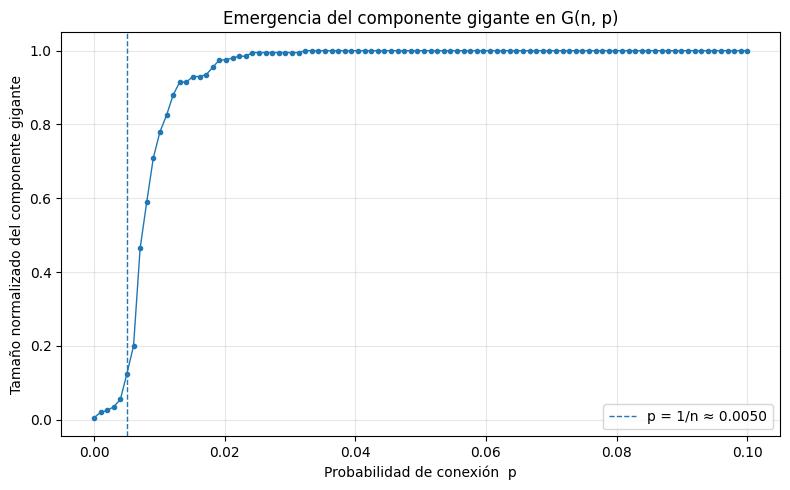

In [1]:
# Problema 1 — Transición de fase en grafos Erdős–Rényi (G(n, p))


import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 1) Parámetros de simulación
n = 200                                   # número de nodos
p_values = np.linspace(0.0, 0.1, 100)     # 100 probabilidades entre 0 y 0.1
seed = 42                                  # semilla para reproducibilidad (opcional)

# 2) Contenedor para tamaños normalizados del componente gigante
giant_norm = []

# 3) Simulación para cada p
for p in p_values:
    # Grafo Erdős–Rényi no dirigido G(n, p)
    G = nx.erdos_renyi_graph(n=n, p=p, seed=seed, directed=False)
    
    # Componentes conectados (conjunto de nodos por componente)
    components = list(nx.connected_components(G)) if G.number_of_nodes() > 0 else []
    
    # Tamaño del componente más grande
    largest_size = max((len(c) for c in components), default=0)
    
    # Tamaño normalizado
    giant_norm.append(largest_size / n)

giant_norm = np.array(giant_norm)

# 4) Umbral teórico aproximado de conectividad (emergencia del gigante)
p_threshold = 1.0 / n

# 5) Gráfica
plt.figure(figsize=(8, 5))
plt.plot(p_values, giant_norm, marker='o', ms=3, lw=1)
plt.axvline(p_threshold, linestyle='--', linewidth=1, label=f"p = 1/n ≈ {p_threshold:.4f}")

plt.title("Emergencia del componente gigante en G(n, p)")
plt.xlabel("Probabilidad de conexión  p")
plt.ylabel("Tamaño normalizado del componente gigante")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


## Análisis de la transición de fase en $G(n,p)$ ($n=200$)

### 1) ¿Transición gradual o abrupta? ¿En qué $p$ ocurre?
- El **tamaño normalizado del componente gigante** pasa de ≈0 a ≈1 en un **salto abrupto** (no gradual).
- El cambio se inicia cerca de $p \approx 0.004$ y se vuelve muy marcado entre $p \in [0.006,\,0.015]$.
- Para $p \gtrsim 0.02$ el componente gigante cubre prácticamente **toda** la red.

**Conclusión:** la transición observada es **abrupta**, con el quiebre principal alrededor de $p \approx 0.01$.



### 2) Comparación con el umbral teórico $p_c = 1/n$
- Con $n=200$, $p_c = 1/n \approx 0.0050$ (línea discontinua).
- En la simulación, la emergencia del gigante comienza **muy cerca** de ese valor y se consolida algo **por encima** (p. ej., $0.007$–$0.015$).

**Tamaño finito (explicación):**
- En grafos finitos y con una sola realización, el punto aparente puede **desplazarse** por **azar muestral**.
- Diferenciar:
  - **Umbral de componente gigante:** $np \approx 1 \Rightarrow p \approx 1/n$.
  - **Umbral de conectividad total:** $p_{\text{conn}} \approx \ln(n)/n$.  
    Para $n=200$: $\ln(200)/200 \approx 0.0265$.  
    La curva roza valores ≈1 cerca de ese rango, coherente con conectividad casi total.


### 3) Interpretación epidemiológica
- Si el **parámetro de transmisión** (análogo a $p$) **cruza el umbral crítico**, aparece un **componente gigante** de individuos conectados por rutas de contagio.
- En $G(n,p)$, el criterio medio se asocia a $np \approx 1$, equivalente a un número reproductivo esperado **$\ge 1$**.
- **Debajo del umbral:** **brotes locales** que se extinguen.  
  **Encima del umbral:** **brotes generalizados** o epidemias extensas.


